In [1]:
import pandas as pd
back = pd.read_hdf('backtracks.hdf5')

In [2]:
mc = pd.read_hdf('mc.hdf5')

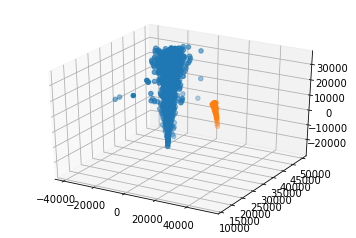

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
# взята два первых ливня и нарисованы точки по координатам 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(2):
    ax.scatter(mc['BT_X'][i], mc['BT_Y'][i], mc['BT_Z'][i])
    
#ax.scatter(mc['BT_X'][:2], mc['BT_Y'][:2], mc['BT_Z'][:2])


plt.show()

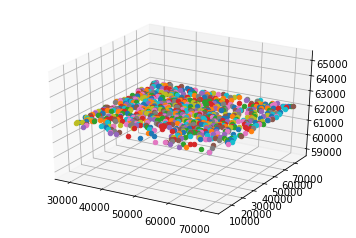

In [4]:
# только точки из back по координатам
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1000):
    ax.scatter(back['s.eX'][i], back['s.eY'][i], back['p'][i] * 1293)
    
#ax.scatter(mc['BT_X'][:2], mc['BT_Y'][:2], mc['BT_Z'][:2])


plt.show()

In [5]:
# рисуем 3 мерную картинку
def display_brick_3d(coord_x, coord_y, coord_z, ang_x, ang_y, ax, color):
    x_n = 204 * ang_x
    y_n = 204 * ang_y
    z_n = 204
    length = np.sqrt(x_n**2 + y_n**2 + z_n**2)
    length = np.mean(length)
    ax.quiver(coord_x, coord_y, coord_z, x_n, y_n, z_n, length = length, normalize=True, color = color)

In [6]:
# 2D изображение
def display_brick_2d(coord_x, coord_y, ang_x, ang_y, ax):
    x_n = 204 * ang_x
    y_n = 204 * ang_y
    ax.quiver(coord_x, coord_y, x_n, y_n)

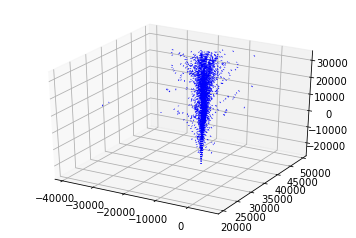

In [7]:
# чтобы показать, что как работают функции display возьмем некоторые данные
x = mc['BT_X'][0]
y = mc['BT_Y'][0]
z = mc['BT_Z'][0]
ang = mc['BT_SX'][0]
ang_y = mc['BT_SY'][0]
fig = plt.figure()
ax = fig.gca(projection='3d')
display_brick_3d(x, y, z, ang, ang_y, ax, 'b')
plt.show()

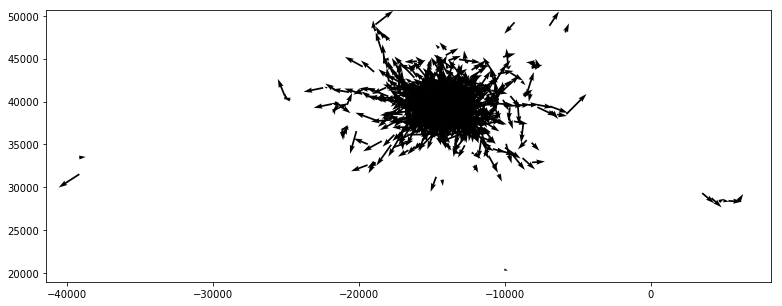

In [8]:
f, ax = plt.subplots(1, 1, figsize=(13, 5))
display_brick_2d(x, y, ang, ang_y, ax)
plt.show()

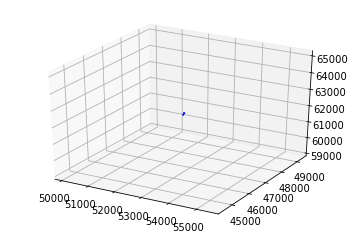

In [9]:
x_back = np.array(back['s.eX'][0])
y_back = np.array(back['s.eY'][0])
z_back = np.array(back['p'][0] * 1293)
ang_x_back = np.array(back['s.eTX'][0])
ang_y_back = np.array(back['s.eTY'][0])
fig = plt.figure()
ax = fig.gca(projection='3d')
display_brick_3d(x_back, y_back, z_back, ang_x_back, ang_y_back, ax, 'b')
plt.show()

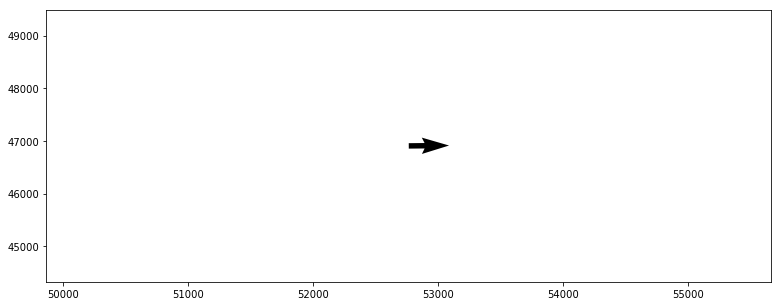

In [10]:
f, ax = plt.subplots(1, 1, figsize=(13, 5))
display_brick_2d(x_back, y_back, ang_x_back, ang_y_back, ax)
plt.show()

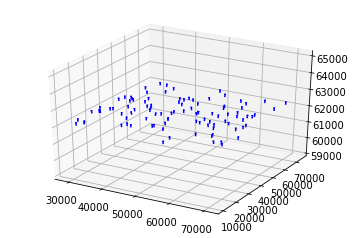

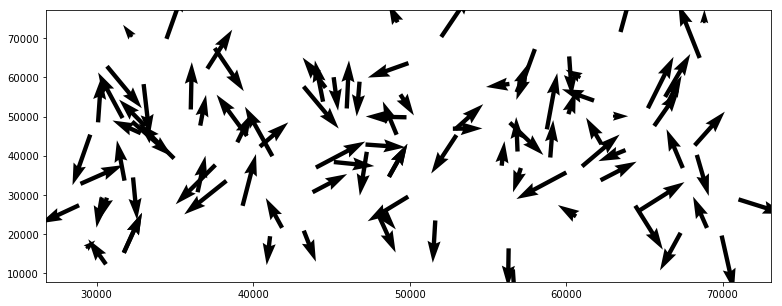

In [11]:
x_back = np.array(back['s.eX'][:100])
y_back = np.array(back['s.eY'][:100])
z_back = np.array(back['p'][:100] * 1293)
ang_x_back = np.array(back['s.eTX'][:100])
ang_y_back = np.array(back['s.eTY'][:100])
fig = plt.figure()
ax = fig.gca(projection='3d')
f, ax1 = plt.subplots(1, 1, figsize=(13, 5))
for i in range(100):
    display_brick_3d(x_back[i], y_back[i], z_back[i], ang_x_back[i], ang_y_back[i], ax, 'b')
display_brick_2d(x_back, y_back, ang_x_back, ang_y_back, ax1)
plt.show()

In [12]:
def my_minimum(sample):
    minimum = []
    for elem in sample:
        if len(elem) !=0:
            minimum.append(np.min(elem))
    return np.min(minimum)

def my_maximum(sample):
    maximum = []
    for elem in sample:
        if len(elem) !=0:
            maximum.append(np.max(elem))
    return np.max(maximum)

In [13]:
# выберем рандомно объекты из выборок и изобразим
import random

indices = np.random.randint(0, 18723, size = 100)
indices_b = np.random.randint(0, 18723, size = 10000)
x_mc_sample =  np.array(mc['BT_X'][indices])
y_mc_sample = np.array(mc['BT_Y'][indices])
z_mc_sample = np.array(mc['BT_Z'][indices])
angx_mc_sample = np.array(mc['BT_SX'][indices])
angy_mc_sample = np.array(mc['BT_SY'][indices])

x_b_sample = np.array(back['s.eX'][indices_b])
y_b_sample = np.array(back['s.eY'][indices_b])
z_b_sample = np.array(back['p'][indices_b] * 1293)
angx_b_sample = np.array(back['s.eTX'][indices_b])
angy_b_sample = np.array(back['s.eTY'][indices_b])
x_b_sample = 2 * (x_b_sample - 50000)
y_b_sample = 2 * (y_b_sample - 30000)
z_b_sample = 1000000 * (z_b_sample) - 62064000000
#indices_w = np.random.randint(0, len(z_b_sample), size = 9999)

x_b_sample = x_b_sample + np.random.randint(my_minimum(x_mc_sample), my_maximum(x_mc_sample), size = 10000)
y_b_sample = y_b_sample + np.random.randint(my_minimum(y_mc_sample), my_maximum(y_mc_sample), size = 10000)
z_b_sample = z_b_sample + np.random.randint(my_minimum(z_mc_sample), my_maximum(z_mc_sample), size = 10000)

/Users/viktor/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/viktor/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


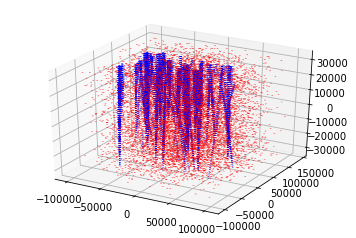

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
display_brick_3d(x_b_sample, y_b_sample, z_b_sample, angx_b_sample, angy_b_sample, ax, 'r')
for i in range(100):
    display_brick_3d(x_mc_sample[i], y_mc_sample[i], z_mc_sample[i], angx_mc_sample[i], angy_mc_sample[i], ax, 'b')
plt.show()

/Users/viktor/anaconda/lib/python3.6/site-packages/matplotlib/quiver.py:648: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/Users/viktor/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


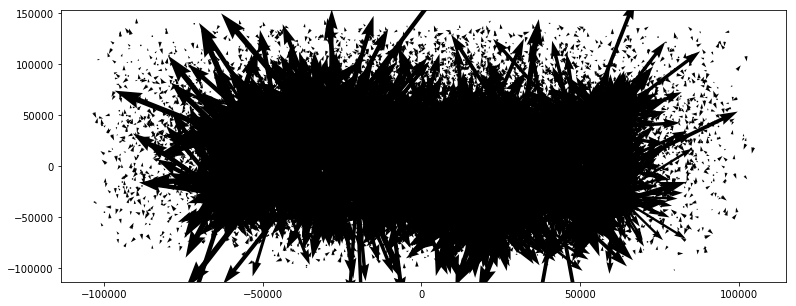

In [15]:
f, ax = plt.subplots(1, 1, figsize=(13, 5))
display_brick_2d(x_b_sample, y_b_sample, angx_b_sample, angy_b_sample, ax)
for i in range(100):
    display_brick_2d(x_mc_sample[i], y_mc_sample[i], angx_mc_sample[i], angy_mc_sample[i], ax)
plt.show()